# Data Downloading and Widgets with NBA Data
We will be analyzing the stats provided by the NBA website by downloading the data using an appropriate selection of endpoint and parameters using an interactive widget, creating visuals, and transforming the data into a new, hopefully useful statistic.

### Data Download

The [NBA's stats website](https://stats.nba.com) has a plethora of stats that are available for all players and teams dating back many decades. Some stats have not been tracked until more recent years, but there is more than enough for us to be able to analyze. The stats that we will be looking at are the [passing stats for each player](http://stats.nba.com/player/201166/passes-dash), or the "passes dashboard." For someone unfamiliar with basketball and the NBA, these stats track how often a certain player passes to each of his teammates as well as the shooting outcome immediately following one of these passes. First, we must be able to grab the data for any player on any team. Much of the following chunks of code was provided by Professor Oh and will work perfectly for our analysis.

In [1]:
import pandas as pd

def get_nba_data(endpt, params, return_url=False):

    ## endpt: https://github.com/seemethere/nba_py/wiki/stats.nba.com-Endpoint-Documentation
    ## params: dictionary of parameters: i.e., {'LeagueID':'00'}
    
    from pandas import DataFrame
    from urllib.parse import urlencode
    import json
    
    useragent = "\"Mozilla/5.0 (Macintosh; Intel Mac OS X 10_11_2) AppleWebKit/601.3.9 (KHTML, like Gecko) Version/9.0.2 Safari/601.3.9\""
    dataurl = "\"" + "http://stats.nba.com/stats/" + endpt + "?" + urlencode(params) + "\""
    
    # for debugging: just return the url
    if return_url:
        return(dataurl)
    
    jsonstr = !wget -q -O - --user-agent={useragent} {dataurl}
    
    data = json.loads(jsonstr[0])
    
    h = data['resultSets'][0]['headers']
    d = data['resultSets'][0]['rowSet']
    
    return(DataFrame(d, columns=h))

The NBA indexes each team and each player by an internal ID, and these IDs are used to pass into URLs to obtain the relevant data. So, we must first be able to grab each unique ID.

In [2]:
## get all teams
params = {'LeagueID':'00'}
teams = get_nba_data('commonTeamYears', params)

## get all players
params = {'LeagueID':'00', 'Season': '2017-18', 'IsOnlyCurrentSeason': '0'}
players = get_nba_data('commonallplayers', params)

In [3]:
teams.MAX_YEAR

0     2017
1     2017
2     2017
3     2017
4     2017
5     2017
6     2017
7     2017
8     2017
9     2017
10    2017
11    2017
12    2017
13    2017
14    2017
15    2017
16    2017
17    2017
18    2017
19    2017
20    2017
21    2017
22    2017
23    2017
24    2017
25    2017
26    2017
27    2017
28    2017
29    2017
30    1946
31    1948
32    1949
33    1949
34    1950
35    1954
36    1949
37    1952
38    1949
39    1949
40    1949
41    1946
42    1946
43    1948
44    1946
Name: MAX_YEAR, dtype: object

We can see that there are several teams that are no longer part of the league, so we will filter these out.

In [4]:
teams = teams[teams.MAX_YEAR == '2017']
teams

,LEAGUE_ID,TEAM_ID,MIN_YEAR,MAX_YEAR,ABBREVIATION
0,00,1610612737,1949,2017,ATL
1,00,1610612738,1946,2017,BOS
2,00,1610612739,1970,2017,CLE
3,00,1610612740,2002,2017,NOP
4,00,1610612741,1966,2017,CHI
5,00,1610612742,1980,2017,DAL
6,00,1610612743,1976,2017,DEN
7,00,1610612744,1946,2017,GSW
8,00,1610612745,1967,2017,HOU
9,00,1610612746,1970,2017,LAC


In [5]:
players.head()

,PERSON_ID,DISPLAY_LAST_COMMA_FIRST,DISPLAY_FIRST_LAST,ROSTERSTATUS,FROM_YEAR,TO_YEAR,PLAYERCODE,TEAM_ID,TEAM_CITY,TEAM_NAME,TEAM_ABBREVIATION,TEAM_CODE,GAMES_PLAYED_FLAG
0,76001,"Abdelnaby, Alaa",Alaa Abdelnaby,0,1990,1994,HISTADD_alaa_abdelnaby,0,,,,,Y
1,76002,"Abdul-Aziz, Zaid",Zaid Abdul-Aziz,0,1968,1977,HISTADD_zaid_abdul-aziz,0,,,,,Y
2,76003,"Abdul-Jabbar, Kareem",Kareem Abdul-Jabbar,0,1969,1988,HISTADD_kareem_abdul-jabbar,0,,,,,Y
3,51,"Abdul-Rauf, Mahmoud",Mahmoud Abdul-Rauf,0,1990,2000,mahmoud_abdul-rauf,0,,,,,Y
4,1505,"Abdul-Wahad, Tariq",Tariq Abdul-Wahad,0,1997,2003,tariq_abdul-wahad,0,,,,,Y


Many players obviously are no longer in the league as well, so we will limit our data to players who have played for one of the currently playing teams.

In [6]:
players = players[players.TEAM_ID.isin(teams.TEAM_ID)]
players.head()

,PERSON_ID,DISPLAY_LAST_COMMA_FIRST,DISPLAY_FIRST_LAST,ROSTERSTATUS,FROM_YEAR,TO_YEAR,PLAYERCODE,TEAM_ID,TEAM_CITY,TEAM_NAME,TEAM_ABBREVIATION,TEAM_CODE,GAMES_PLAYED_FLAG
9,203518,"Abrines, Alex",Alex Abrines,1,2016,2017,alex_abrines,1610612760,Oklahoma City,Thunder,OKC,thunder,Y
14,203112,"Acy, Quincy",Quincy Acy,1,2012,2017,quincy_acy,1610612751,Brooklyn,Nets,BKN,nets,Y
20,203500,"Adams, Steven",Steven Adams,1,2013,2017,steven_adams,1610612760,Oklahoma City,Thunder,OKC,thunder,Y
22,1628389,"Adebayo, Bam",Bam Adebayo,1,2017,2017,bam_adebayo,1610612748,Miami,Heat,MIA,heat,Y
25,201167,"Afflalo, Arron",Arron Afflalo,1,2007,2017,arron_afflalo,1610612753,Orlando,Magic,ORL,magic,Y


Now, we must do some cleaning in order to get the teams and players to have easily accessible IDs as well as readable text to output later on. We will assemble this all into dictionaries.

In [7]:
team_names = players[['TEAM_ABBREVIATION','TEAM_CODE']].drop_duplicates()
teams = pd.merge(teams, team_names, left_on='ABBREVIATION', right_on='TEAM_ABBREVIATION')
teams.TEAM_CODE = teams.TEAM_CODE.str.capitalize() # returns values so needs to be reassigned
teams.sort_values('ABBREVIATION', inplace=True)    # modifies object
teams

,LEAGUE_ID,TEAM_ID,MIN_YEAR,MAX_YEAR,ABBREVIATION,TEAM_ABBREVIATION,TEAM_CODE
0,00,1610612737,1949,2017,ATL,ATL,Hawks
14,00,1610612751,1976,2017,BKN,BKN,Nets
1,00,1610612738,1946,2017,BOS,BOS,Celtics
29,00,1610612766,1988,2017,CHA,CHA,Hornets
4,00,1610612741,1966,2017,CHI,CHI,Bulls
2,00,1610612739,1970,2017,CLE,CLE,Cavaliers
5,00,1610612742,1980,2017,DAL,DAL,Mavericks
6,00,1610612743,1976,2017,DEN,DEN,Nuggets
28,00,1610612765,1948,2017,DET,DET,Pistons
7,00,1610612744,1946,2017,GSW,GSW,Warriors


In [8]:
team_dd_text = teams.TEAM_ABBREVIATION+', '+teams.TEAM_CODE
team_dd = dict(zip(team_dd_text, teams.TEAM_ID))
team_dd

{'ATL, Hawks': 1610612737,
 'BKN, Nets': 1610612751,
 'BOS, Celtics': 1610612738,
 'CHA, Hornets': 1610612766,
 'CHI, Bulls': 1610612741,
 'CLE, Cavaliers': 1610612739,
 'DAL, Mavericks': 1610612742,
 'DEN, Nuggets': 1610612743,
 'DET, Pistons': 1610612765,
 'GSW, Warriors': 1610612744,
 'HOU, Rockets': 1610612745,
 'IND, Pacers': 1610612754,
 'LAC, Clippers': 1610612746,
 'LAL, Lakers': 1610612747,
 'MEM, Grizzlies': 1610612763,
 'MIA, Heat': 1610612748,
 'MIL, Bucks': 1610612749,
 'MIN, Timberwolves': 1610612750,
 'NOP, Pelicans': 1610612740,
 'NYK, Knicks': 1610612752,
 'OKC, Thunder': 1610612760,
 'ORL, Magic': 1610612753,
 'PHI, Sixers': 1610612755,
 'PHX, Suns': 1610612756,
 'POR, Blazers': 1610612757,
 'SAC, Kings': 1610612758,
 'SAS, Spurs': 1610612759,
 'TOR, Raptors': 1610612761,
 'UTA, Jazz': 1610612762,
 'WAS, Wizards': 1610612764}

In [9]:
plyr_by_team_dd = dict()
for t, p in players.groupby('TEAM_ID'):
    plyr_by_team_dd[t] = dict(zip(p.DISPLAY_LAST_COMMA_FIRST, p.PERSON_ID))
plyr_by_team_dd

{1610612737: {'Bazemore, Kent': 203145,
  "Bembry, DeAndre'": 1627761,
  'Cavanaugh, Tyler': 1628463,
  'Cleveland, Antonius': 1628499,
  'Collins, John': 1628381,
  'Dedmon, Dewayne': 203473,
  'Delaney, Malcolm': 1627098,
  'Dorsey, Tyler': 1628416,
  'Evans, Jeremy': 202379,
  'Lee, Damion': 1627814,
  'Magette, Josh': 203705,
  'Morris, Jaylen': 1628537,
  'Muscala, Mike': 203488,
  'Plumlee, Miles': 203101,
  'Prince, Taurean': 1627752,
  'Schroder, Dennis': 203471,
  'Taylor, Isaiah': 1627819,
  'White III, Andrew': 1628510},
 1610612738: {'Allen, Kadeem': 1628443,
  'Baynes, Aron': 203382,
  'Bird, Jabari': 1628444,
  'Brown, Jaylen': 1627759,
  'Gibson, Jonathan': 1626780,
  'Hayward, Gordon': 202330,
  'Horford, Al': 201143,
  'Irving, Kyrie': 202681,
  'Larkin, Shane': 203499,
  'Monroe, Greg': 202328,
  'Morris, Marcus': 202694,
  'Nader, Abdel': 1627846,
  'Ojeleye, Semi': 1628400,
  'Rozier, Terry': 1626179,
  'Silas, Xavier': 202918,
  'Smart, Marcus': 203935,
  'Tatum, J

In [10]:
plyr_dd_text = players.DISPLAY_LAST_COMMA_FIRST
plyr_dd_id = players.PERSON_ID
plyr_dd = dict(zip(plyr_dd_text, plyr_dd_id))
plyr_dd

{'Abrines, Alex': 203518,
 'Acy, Quincy': 203112,
 'Adams, Steven': 203500,
 'Adebayo, Bam': 1628389,
 'Afflalo, Arron': 201167,
 'Ajinca, Alexis': 201582,
 'Aldrich, Cole': 202332,
 'Aldridge, LaMarcus': 200746,
 'Allen, Jarrett': 1628386,
 'Allen, Kadeem': 1628443,
 'Aminu, Al-Farouq': 202329,
 'Anderson, Justin': 1626147,
 'Anderson, Kyle': 203937,
 'Anderson, Ryan': 201583,
 'Anigbogu, Ike': 1628387,
 'Antetokounmpo, Giannis': 203507,
 'Anthony, Carmelo': 2546,
 'Anunoby, OG': 1628384,
 'Arcidiacono, Ryan': 1627853,
 'Ariza, Trevor': 2772,
 'Arthur, Darrell': 201589,
 'Artis, Jamel': 1628503,
 'Asik, Omer': 201600,
 'Augustin, D.J.': 201571,
 'Babbitt, Luke': 202337,
 'Bacon, Dwayne': 1628407,
 'Baker, Ron': 1627758,
 'Baldwin IV, Wade': 1627735,
 'Ball, Lonzo': 1628366,
 'Barea, J.J.': 200826,
 'Barnes, Harrison': 203084,
 'Barton, Will': 203115,
 'Batum, Nicolas': 201587,
 'Bayless, Jerryd': 201573,
 'Baynes, Aron': 203382,
 'Bazemore, Kent': 203145,
 'Beal, Bradley': 203078,
 'B

Aside from choosing a team and a player, we will also create a third widget to filter the stats by outcome of the game. That is, we want to be able to have the option to see the stats for a player only when his team wins or only when his team loses.

In [11]:
outcome_dd = {'Both':'',
              'Win': 'W',
              'Loss': 'L'}

## Creating Visuals (Pt. 1)

While we don't quite have our widgets in place yet, we want to define a function that will take in a data frame and give us a desired output - in our case, a barplot.

In [17]:
def get_charts(df2):
    chart_df = (df2[['PASS_TO','FGA','FG2M','FG3M','FG2A','FG3A']]
                    .copy())               
       
    chart_df['3_MISS'] = chart_df.FGA
    chart_df['2_MISS'] = chart_df.FG2A + chart_df.FG3M
    chart_df['3_MAKE'] = chart_df.FG2M + chart_df.FG3M
    chart_df['2_MAKE'] = chart_df.FG2M
    chart_df = (chart_df.drop(chart_df.ix[:,'FGA':'FG3A'], axis = 1)
                   .sort_values('3_MISS', ascending=False))
    
    sns.set(style='darkgrid')
    f, ax = plt.subplots(figsize=(15, 10))

    sns.set_color_codes('pastel')
    sns.barplot(x='3_MISS', y='PASS_TO', data=chart_df,
                label='3 Pts Missed', color='r')

    sns.set_color_codes("muted")
    sns.barplot(x='2_MISS', y='PASS_TO', data=chart_df,
                label='2 Pts Missed', color='r')

    sns.set_color_codes('pastel')
    sns.barplot(x='3_MAKE', y='PASS_TO', data=chart_df,
                label='3 Pts Made', color='b')

    sns.set_color_codes('muted')
    sns.barplot(x='2_MAKE', y='PASS_TO', data=chart_df,
                label='2 Pts Made', color='b')

    ax.legend(ncol=2, loc="lower right", frameon=True)
    ax.set(ylabel="",
           xlabel="Field Goal Totals",
           title='Field Goal Distributions of Recipients\' Passes')

    plt.show()

The reason why we transform some of the columns will become more apparent once we can see the chart.

## Interactive Widgets

Now we are ready to implement our widgets with our dictionaries and our defined function `get_charts`. A player must have recorded passes for the given filters.

Dropdown(options={'ATL, Hawks': 1610612737, 'BKN, Nets': 1610612751, 'BOS, Celtics': 1610612738, 'CHA, Hornets': 1610612766, 'CHI, Bulls': 1610612741, 'CLE, Cavaliers': 1610612739, 'DAL, Mavericks': 1610612742, 'DEN, Nuggets': 1610612743, 'DET, Pistons': 1610612765, 'GSW, Warriors': 1610612744, 'HOU, Rockets': 1610612745, 'IND, Pacers': 1610612754, 'LAC, Clippers': 1610612746, 'LAL, Lakers': 1610612747, 'MEM, Grizzlies': 1610612763, 'MIA, Heat': 1610612748, 'MIL, Bucks': 1610612749, 'MIN, Timberwolves': 1610612750, 'NOP, Pelicans': 1610612740, 'NYK, Knicks': 1610612752, 'OKC, Thunder': 1610612760, 'ORL, Magic': 1610612753, 'PHI, Sixers': 1610612755, 'PHX, Suns': 1610612756, 'POR, Blazers': 1610612757, 'SAC, Kings': 1610612758, 'SAS, Spurs': 1610612759, 'TOR, Raptors': 1610612761, 'UTA, Jazz': 1610612762, 'WAS, Wizards': 1610612764}, value=1610612737)

Dropdown(options={'Bazemore, Kent': 203145, "Bembry, DeAndre'": 1627761, 'Cavanaugh, Tyler': 1628463, 'Cleveland, Antonius': 1628499, 'Collins, John': 1628381, 'Dedmon, Dewayne': 203473, 'Delaney, Malcolm': 1627098, 'Dorsey, Tyler': 1628416, 'Evans, Jeremy': 202379, 'Lee, Damion': 1627814, 'Magette, Josh': 203705, 'Morris, Jaylen': 1628537, 'Muscala, Mike': 203488, 'Plumlee, Miles': 203101, 'Prince, Taurean': 1627752, 'Schroder, Dennis': 203471, 'Taylor, Isaiah': 1627819, 'White III, Andrew': 1628510}, value=203145)

Dropdown(options={'Both': '', 'Win': 'W', 'Loss': 'L'}, value='')

Button(description='Get Data!', icon='check', style=ButtonStyle())

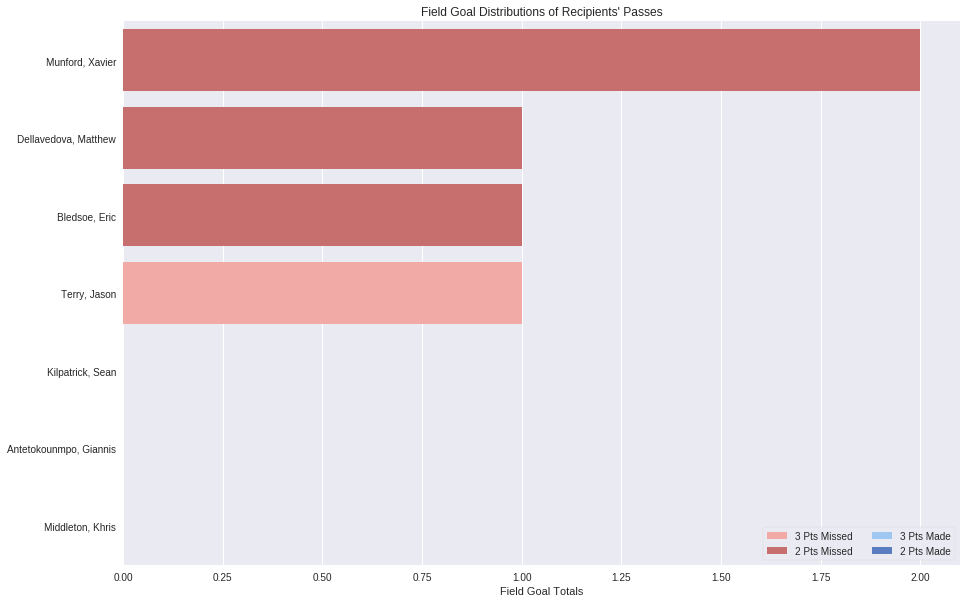

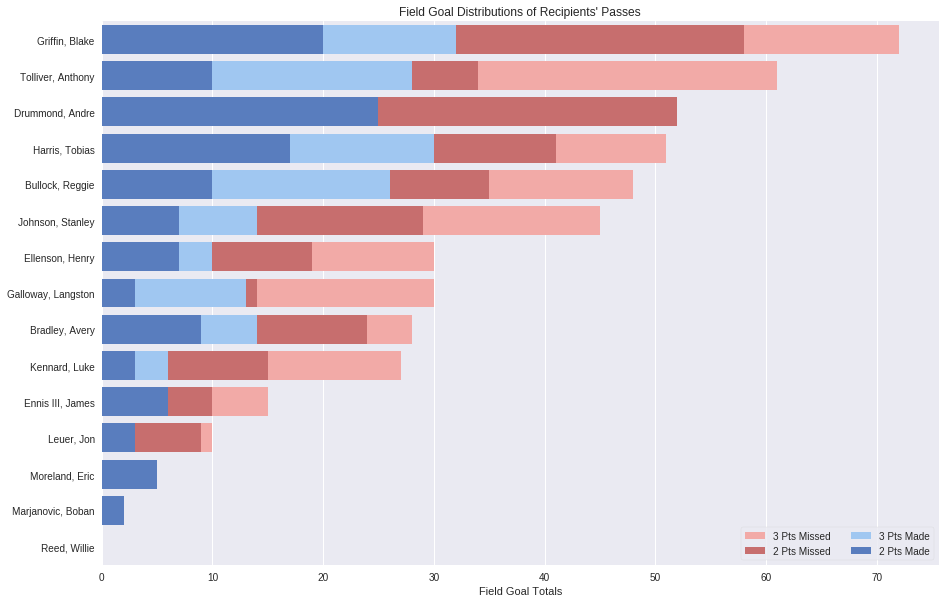

In [18]:
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()  # set plot style
from IPython.core.pylabtools import figsize
figsize(11, 9)

from ipywidgets import interact, FloatSlider, Dropdown, Button

selected = 'ATL, Hawks'

team_menu = Dropdown(options=team_dd, label=selected)
plyr_menu = Dropdown(options=plyr_by_team_dd[team_dd[selected]])
outcome_menu = Dropdown(options=outcome_dd)
fetch_button = Button(description='Get Data!', icon='check')

display(team_menu, plyr_menu, outcome_menu, fetch_button)

## update players list
def update_team(change):
    plyr_menu.options = plyr_by_team_dd[change['new']]
    plyr_menu.value = list(plyr_by_team_dd[change['new']].values())[0]

team_menu.observe(update_team, names='value')

## get data action
def get_data(change):
    params = {'DateFrom':'',
              'DateTo':'',
              'GameSegment':'',
              'LastNGames':'0',
              'LeagueID':'00',
              'Location':'',
              'Month':'0',
              'OpponentTeamID':'0',
              'Outcome':outcome_menu.value,
              'PORound':'0',
              'PerMode':'Totals',
              'Period':'0',
              'PlayerID':plyr_menu.value,
              'Season':'2017-18',
              'SeasonSegment':'',
              'SeasonType':'Regular Season',
              'TeamID':'0',
              'VsConference':'',
              'VsDivision':''
             }

    df = (get_nba_data('playerdashptpass', params))
    get_charts(df)
fetch_button.on_click(get_data)

The charts may take a moment to interpret, and there are some advantages and disadvantages to how they are displayed. Essentially, each block of color corresponds to the amount provided in the key on the bottom right. The blocks are not cumulative, but the values themselves are cumuluative, which is why we transformed these columns earlier in our function. With this chart, we can visually interpret the proportions for 2 point and 3 point makes and misses separately. The downside is that it is more difficult to estimate the overall field goal percentage per player.

## Data Transformation and Creating Visuals (Pt. 2)

Now we want to look at transforming data using the split-apply-combine method. We will again define a function that will handle dropbown menus that the user will be able to interact with. Additionally, it may be interesting to explore how many points on average we expect a player to make per shot broken down into two point shots and three point shots.

In [14]:
def get_pps_chart(df3):
    pps_df = (pd.melt(df3, value_vars=['FG2M','FG3M','FG2A','FG3A'])
                      .query('value > 0'))
    pps_df['SHOT_TYPE'] = 2
    pps_df['PT_WT'] = 1
    pps_df.loc[pps_df.variable.str.contains('^FG3'),'SHOT_TYPE'] = 3
    pps_df = (pps_df.groupby(['SHOT_TYPE','variable']).sum()
                      .drop(['PT_WT'], axis=1)
                      .reset_index()
                      .pivot(index='SHOT_TYPE', columns='variable')['value'])
    pps_df.loc[pps_df.FG2A > 0, 'PPS'] = 2 * pps_df.FG2M / pps_df.FG2A
    pps_df.loc[pps_df.FG3A > 0, 'PPS'] = 3 * pps_df.FG3M / pps_df.FG3A
    pps_df = (pps_df.drop(['FG2A','FG3M','FG2M','FG3A'], axis=1)
                      .reset_index())
    
    sns.set(style="darkgrid", context="notebook", font_scale=1.5)
    f, ax = plt.subplots(figsize=(6,8))

    sns.barplot(x='SHOT_TYPE', y='PPS', data=pps_df)
    ax.set(ylabel="Points per Shot",
           xlabel="Shot Type",
           title='Points Per Shot Type After Pass',
           ylim=(0,3))
    plt.show()

Finally, we get a simple comparison on when a player's teammates are more successful when shooting two point shots or three point shots after receiving a pass from that player.

Dropdown(options={'ATL, Hawks': 1610612737, 'BKN, Nets': 1610612751, 'BOS, Celtics': 1610612738, 'CHA, Hornets': 1610612766, 'CHI, Bulls': 1610612741, 'CLE, Cavaliers': 1610612739, 'DAL, Mavericks': 1610612742, 'DEN, Nuggets': 1610612743, 'DET, Pistons': 1610612765, 'GSW, Warriors': 1610612744, 'HOU, Rockets': 1610612745, 'IND, Pacers': 1610612754, 'LAC, Clippers': 1610612746, 'LAL, Lakers': 1610612747, 'MEM, Grizzlies': 1610612763, 'MIA, Heat': 1610612748, 'MIL, Bucks': 1610612749, 'MIN, Timberwolves': 1610612750, 'NOP, Pelicans': 1610612740, 'NYK, Knicks': 1610612752, 'OKC, Thunder': 1610612760, 'ORL, Magic': 1610612753, 'PHI, Sixers': 1610612755, 'PHX, Suns': 1610612756, 'POR, Blazers': 1610612757, 'SAC, Kings': 1610612758, 'SAS, Spurs': 1610612759, 'TOR, Raptors': 1610612761, 'UTA, Jazz': 1610612762, 'WAS, Wizards': 1610612764}, value=1610612737)

Dropdown(options={'Bazemore, Kent': 203145, "Bembry, DeAndre'": 1627761, 'Cavanaugh, Tyler': 1628463, 'Cleveland, Antonius': 1628499, 'Collins, John': 1628381, 'Dedmon, Dewayne': 203473, 'Delaney, Malcolm': 1627098, 'Dorsey, Tyler': 1628416, 'Evans, Jeremy': 202379, 'Lee, Damion': 1627814, 'Magette, Josh': 203705, 'Morris, Jaylen': 1628537, 'Muscala, Mike': 203488, 'Plumlee, Miles': 203101, 'Prince, Taurean': 1627752, 'Schroder, Dennis': 203471, 'Taylor, Isaiah': 1627819, 'White III, Andrew': 1628510}, value=203145)

Dropdown(options={'Both': '', 'Win': 'W', 'Loss': 'L'}, value='')

Button(description='Get Data!', icon='check', style=ButtonStyle())

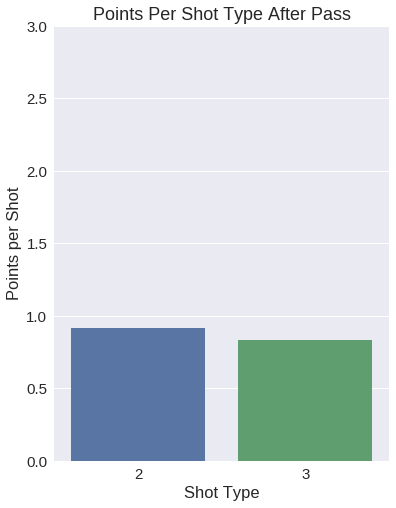

In [19]:
## Passing widget
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()  # set plot style
from IPython.core.pylabtools import figsize
figsize(11, 9)

from ipywidgets import interact, FloatSlider, Dropdown, Button

selected = 'ATL, Hawks'

team_menu = Dropdown(options=team_dd, label=selected)
plyr_menu = Dropdown(options=plyr_by_team_dd[team_dd[selected]])
outcome_menu = Dropdown(options=outcome_dd)
fetch_button = Button(description='Get Data!', icon='check')

display(team_menu, plyr_menu, outcome_menu, fetch_button)

## update players list
def update_team(change):
    plyr_menu.options = plyr_by_team_dd[change['new']]
    plyr_menu.value = list(plyr_by_team_dd[change['new']].values())[0]

team_menu.observe(update_team, names='value')

## get data action
def get_data(change):
    params = {'DateFrom':'',
              'DateTo':'',
              'GameSegment':'',
              'LastNGames':'0',
              'LeagueID':'00',
              'Location':'',
              'Month':'0',
              'OpponentTeamID':'0',
              'Outcome':outcome_menu.value,
              'PORound':'0',
              'PerMode':'Totals',
              'Period':'0',
              'PlayerID':plyr_menu.value,
              'Season':'2017-18',
              'SeasonSegment':'',
              'SeasonType':'Regular Season',
              'TeamID':'0',
              'VsConference':'',
              'VsDivision':''
             }

    df = (get_nba_data('playerdashptpass', params))
    get_pps_chart(df)
fetch_button.on_click(get_data)

## Limitations

It is important to note that these stats provided by the NBA do not account for passes that lead to foul shots. This is an important part of analyzing how well a player "sets up" his teammates, and it may also skew the data as two point shots lead to more foul shots than three point shots. Regardless, this tool is a great way to see a player's secondary impact on the game. 